In [2]:
import pyforest
import os
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [9]:
# Checking the information of the whole dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [12]:
## General statistics of the data
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Checking null values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
# Checking duplicated values

df.duplicated().sum()

0

# In our Neural Network Architechture we will keep 1 input layer of 7 nodes, 1 Hidden Layer of 7 nodes and 1 Output Layer

In [13]:
# Dropping irrelevant column

df.drop(columns=['Serial No.'], inplace=True)


In [14]:
# Separating the data for training and testing

X = df.iloc[:,0:-1]
y= df.iloc[:,-1]

In [15]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [16]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [19]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
304,313,106,2,2.5,2.0,8.43,0
340,312,107,3,3.0,3.0,8.46,1
47,339,119,5,4.5,4.0,9.70,0
67,316,107,2,3.5,3.5,8.64,1
479,325,110,4,4.5,4.0,8.96,1
...,...,...,...,...,...,...,...
11,327,111,4,4.0,4.5,9.00,1
192,322,114,5,4.5,4.0,8.94,1
92,298,98,2,4.0,3.0,8.03,0
221,316,110,3,3.5,4.0,8.56,0


In [20]:
# we have to scale our data before applying in the neural network
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [21]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [22]:
X_test_scaled

array([[0.46      , 0.48      , 0.25      , 0.375     , 0.25      ,
        0.44140625, 0.        ],
       [0.44      , 0.52      , 0.5       , 0.5       , 0.5       ,
        0.453125  , 1.        ],
       [0.98      , 1.        , 1.        , 0.875     , 0.75      ,
        0.9375    , 0.        ],
       [0.52      , 0.52      , 0.25      , 0.625     , 0.625     ,
        0.5234375 , 1.        ],
       [0.7       , 0.64      , 0.75      , 0.875     , 0.75      ,
        0.6484375 , 1.        ],
       [0.42      , 0.28      , 0.25      , 0.375     , 0.625     ,
        0.40625   , 1.        ],
       [0.6       , 0.4       , 0.5       , 0.5       , 0.625     ,
        0.5625    , 1.        ],
       [0.74      , 0.36      , 0.5       , 0.75      , 0.75      ,
        0.390625  , 1.        ],
       [0.62      , 0.68      , 0.5       , 0.625     , 0.75      ,
        0.59765625, 1.        ],
       [0.56      , 0.48      , 0.25      , 0.75      , 0.75      ,
        0.2421875 , 1. 

In [23]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [24]:
model = Sequential()

#creating hidden layer with 7 input dimension
model.add(Dense(7, activation='relu', input_dim=7))

# creating output layer with the linear activation as it is a regression problem
model.add(Dense(1, activation='linear'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='mean_squared_error', optimizer= 'Adam')

In [29]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
10/10 [==============================] - 0s 14ms/step - loss: 0.2190 - val_loss: 0.1957
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1636 - val_loss: 0.1420
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1168 - val_loss: 0.0999
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0803 - val_loss: 0.0672
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.0434
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.0275
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0182
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.0140
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0124
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0117


In [30]:
# getting predictions

y_pred = model.predict(X_test_scaled)
y_pred

4/4 [==============================] - 0s 1ms/step


array([[0.6850376 ],
       [0.6595203 ],
       [1.1667035 ],
       [0.66300327],
       [0.69424903],
       [0.5971305 ],
       [0.64020926],
       [0.6059281 ],
       [0.728655  ],
       [0.6323513 ],
       [0.7264938 ],
       [0.612036  ],
       [0.72535306],
       [0.9828887 ],
       [0.69834214],
       [0.8281429 ],
       [0.6170445 ],
       [0.79781324],
       [0.86916554],
       [0.63538   ],
       [0.53276926],
       [0.66887605],
       [0.71067566],
       [0.87037057],
       [0.87090594],
       [0.58283   ],
       [0.9753062 ],
       [0.6034227 ],
       [0.82778823],
       [0.7143325 ],
       [0.581398  ],
       [0.696048  ],
       [0.49902365],
       [0.91203314],
       [0.46345738],
       [0.77317196],
       [0.6730955 ],
       [0.6174867 ],
       [0.6863488 ],
       [0.9065312 ],
       [0.48868743],
       [0.6223189 ],
       [0.88452923],
       [0.9831379 ],
       [0.7979756 ],
       [0.39438987],
       [0.61948156],
       [0.621

In [31]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.30510615767913596

# Very poor r2_score

In [68]:
# Tuning the model

model = Sequential()

#creating hidden layer with 7 input dimension
model.add(Dense(7, activation='relu', input_dim=7))

# adding one more hidden layer
model.add(Dense(7, activation='relu'))

# creating output layer with the linear activation as it is a regression problem
model.add(Dense(1, activation='linear'))

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 7)                 56        
                                                                 
 dense_10 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model.compile(loss='mean_squared_error', optimizer= 'Adam')

In [71]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4109 - val_loss: 0.4099
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3056 - val_loss: 0.3070
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2344 - val_loss: 0.2356
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1785 - val_loss: 0.1791
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1328 - val_loss: 0.1312
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0951 - val_loss: 0.0909
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0636 - val_loss: 0.0600
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0371
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0221
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.0133
Epoch 11

In [72]:
# getting predictions

y_pred = model.predict(X_test_scaled)
y_pred

4/4 [==============================] - 0s 890us/step


array([[0.6069541 ],
       [0.6835621 ],
       [0.9509176 ],
       [0.73654985],
       [0.81451017],
       [0.6200039 ],
       [0.68715554],
       [0.7329646 ],
       [0.77845746],
       [0.75086343],
       [0.60304344],
       [0.58933866],
       [0.69236314],
       [0.7682198 ],
       [0.7529947 ],
       [0.87104744],
       [0.58712643],
       [0.7809958 ],
       [0.88978267],
       [0.58709246],
       [0.68541306],
       [0.80138093],
       [0.8172757 ],
       [0.6068385 ],
       [0.7522166 ],
       [0.48079833],
       [0.9055505 ],
       [0.60397613],
       [0.856117  ],
       [0.7305412 ],
       [0.5691529 ],
       [0.8065913 ],
       [0.51473236],
       [0.91671616],
       [0.37164357],
       [0.8029615 ],
       [0.6103661 ],
       [0.5369356 ],
       [0.6027596 ],
       [0.90698886],
       [0.49449635],
       [0.66718894],
       [0.69798857],
       [0.99961346],
       [0.7722165 ],
       [0.45143685],
       [0.6168696 ],
       [0.587

In [73]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.7301373774768125

# Now r2_score has improved a lot

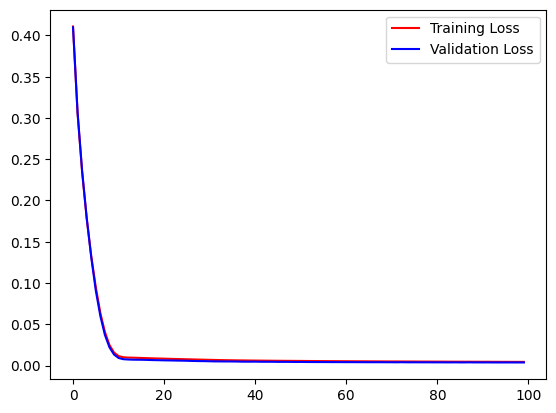

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')

plt.legend()
plt.show()



In [75]:
history.history  # dictionary with keywords - loss, val_loss

{'loss': [0.4108981490135193,
  0.30559712648391724,
  0.2344210147857666,
  0.1785200983285904,
  0.13278043270111084,
  0.0950714498758316,
  0.06364859640598297,
  0.04066672921180725,
  0.02494095079600811,
  0.01575453020632267,
  0.011472100391983986,
  0.010070031508803368,
  0.009636109694838524,
  0.009540123865008354,
  0.009352527558803558,
  0.009187817573547363,
  0.008962534368038177,
  0.008794784545898438,
  0.008627844043076038,
  0.008465618826448917,
  0.008319552056491375,
  0.008155311457812786,
  0.00802623201161623,
  0.007876647636294365,
  0.007739773951470852,
  0.007597879972308874,
  0.007466659881174564,
  0.00730418274179101,
  0.0071659991517663,
  0.007038732524961233,
  0.006884853355586529,
  0.006757439114153385,
  0.006649032235145569,
  0.006549750920385122,
  0.006447954569011927,
  0.006364504806697369,
  0.006284081377089024,
  0.006211438681930304,
  0.006140512879937887,
  0.006081833504140377,
  0.006009464152157307,
  0.005975095089524984,
  